In [5]:
from keras import datasets
reuters = datasets.reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
len(train_data)

8982

In [15]:
len(test_data)

2246

In [17]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [19]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]]) 

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [23]:
int(train_labels[10])

3

In [25]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [32]:
# from keras.utils.np_utils import to_categorical

# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [36]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [38]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [42]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3134 - loss: 3.1970 - val_accuracy: 0.5990 - val_loss: 1.8508
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6537 - loss: 1.6560 - val_accuracy: 0.6940 - val_loss: 1.3668
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7391 - loss: 1.2248 - val_accuracy: 0.7150 - val_loss: 1.2014
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7931 - loss: 0.9932 - val_accuracy: 0.7610 - val_loss: 1.0763
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8259 - loss: 0.8119 - val_accuracy: 0.7830 - val_loss: 1.0059
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8552 - loss: 0.6825 - val_accuracy: 0.7880 - val_loss: 0.9556
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8867 - loss: 0.5583 - val_accuracy: 0.8130 - val_loss: 0.8992
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9025 - loss: 0.4705 - val_accuracy: 0.8100 - v

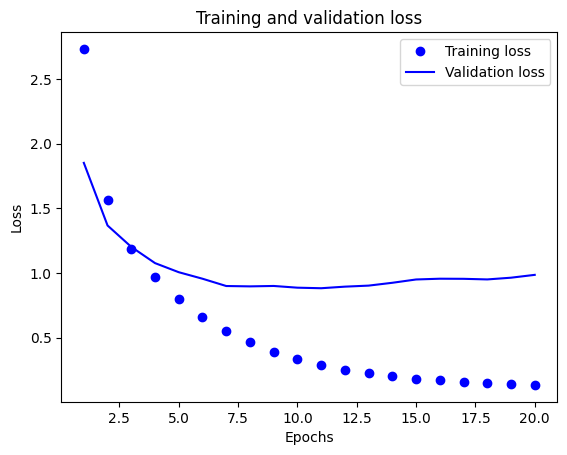

In [58]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

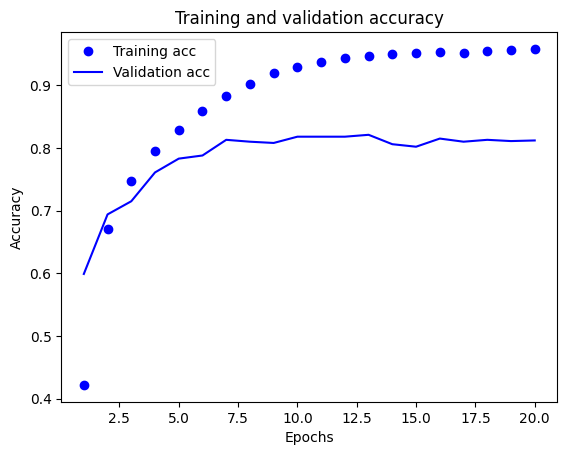

In [60]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [62]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4163 - loss: 3.1727 - val_accuracy: 0.6220 - val_loss: 1.7835
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6631 - loss: 1.6132 - val_accuracy: 0.6950 - val_loss: 1.3606
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7448 - loss: 1.1741 - val_accuracy: 0.7310 - val_loss: 1.1857
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7947 - loss: 0.9584 - val_accuracy: 0.7530 - val_loss: 1.0792
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8349 - loss: 0.7694 - val_accuracy: 0.7870 - val_loss: 1.0055
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8633 - loss: 0.6583 - val_accuracy: 0.8050 - val_loss: 0.9512
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8883 - loss: 0.5515 - val_accuracy: 0.8000 - val_loss: 0.9307
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9067 - loss: 0.4537 - val_accuracy: 0.8090 - val_loss:

In [64]:
results

[0.9345549941062927, 0.7845057845115662]

In [66]:
import copy

In [68]:
test_labels_copy = copy.copy(test_labels)

In [70]:
np.random.shuffle(test_labels_copy)

In [72]:
hits_array = np.array(test_labels) == np.array(test_labels_copy)

In [74]:
float(np.sum(hits_array)) / len(test_labels)

0.19056099732858414

In [76]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [78]:
predictions[0].shape

(46,)

In [82]:
float(np.sum(predictions[0]))

0.9999999403953552

In [86]:
int(np.argmax(predictions[0]))

3

In [88]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [90]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [92]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1268 - loss: 3.3882 - val_accuracy: 0.5050 - val_loss: 2.4652
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5265 - loss: 2.2218 - val_accuracy: 0.5470 - val_loss: 1.7964
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5612 - loss: 1.6735 - val_accuracy: 0.6020 - val_loss: 1.5513
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6262 - loss: 1.4039 - val_accuracy: 0.6440 - val_loss: 1.4244
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6819 - loss: 1.2416 - val_accuracy: 0.6650 - val_loss: 1.3470
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6972 - loss: 1.1184 - val_accuracy: 0.6770 - val_loss: 1.3018
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7213 - loss: 1.0147 - val_accuracy: 0.6860 - val_loss: 1.2941
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7419 - loss: 0.9702 - val_accuracy: 0.7060 - val_lo